In [1]:
from completeRun import featureClf,cv_feature
from preamble import *
from LocalDatasets import saveDict,readDict,ScoresFromPredictions,read_features,readDict, read_duration,checkForExist
import seaborn as sns
from copy import copy
plt.rcParams['savefig.dpi'] = 200
Cat = [3,20, 21, 26, 333, 334, 335,40668, 4135, 4534, 469, 46, 50]
amountList = [0.25,0.5,0.75,1]
NonCat = [1038,1043,1046,1049,1050,1063,1067,1068,1120,1176,11,12,1459,1462,1464,1466,1467,1468,1475,1476,1478,1479,1485,1487]
second = [1489, 1491, 1492, 1493, 1494, 1497, 14, 1501, 1504, 1510, 1515, 1570, 16, 18, 22, 28, 300, 30, 32, 36, 375, 37, 39,40499,40509,40, 4134, 41, 44, 4538, 458, 53, 54]
for i in second:
    NonCat.append(i)
          
cv = 10
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB','GradientBoost']
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB']

In [ ]:
typ = 3
for typ in [2,3]:
    for did in NonCat:
        for amount in amountList:
            featureClf(did,cv,round(amount*(readDict(did)['NumberOfFeatures']-1)),typ)
    for did in Cat:
        for amount in amountList:
            featureClf(did,cv,round(amount*(readDict(did)['NumberOfFeatures']-1)),typ)
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
for amount in amountList:
    for did in NonCat:
        cv_feature(did,cv,amount)
amountList = [0.5,0.6,0.7,0.75,0.8,0.9,1,2,3,4,5,6]
# for amount in amountList:
#     for did in Cat:
#         cv_feature(did,cv,amount)

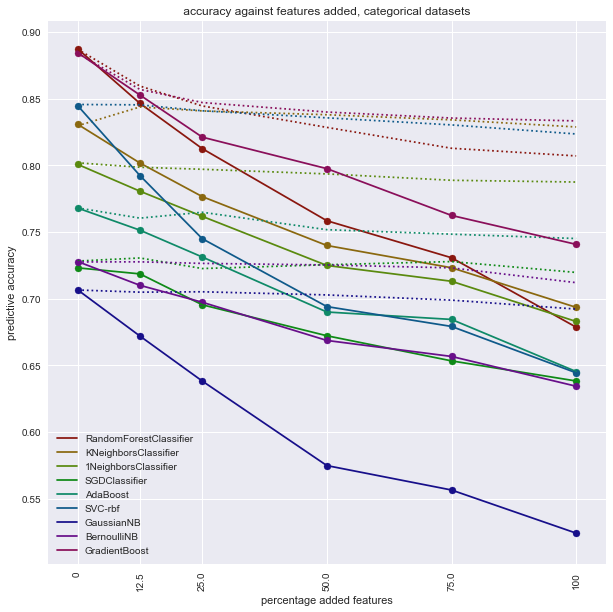

AttributeError: 'int' object has no attribute 'append'

In [80]:
didList = Cat
scores = []
scores2 = []
amountList = [0.125,0.25,0.5,0.75,1]
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        score2 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) or not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            score2.append(read_features(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
        scores[i].append(score1)
        scores2[i].append(score2)
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    score3.append([0 for i in range(len(amountList)+1)])
MaxClass = []
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
            score3[j][0] = score3[j][0] + (scores2[k][j][i][0])/(len(didList)*len(amountList))
            score3[j][i+1] = score3[j][i+1] + (scores2[k][j][i][1])/len(didList)

for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' accuracy against features added, categorical datasets ' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
    _=ax.plot(x_axis, score3[i], color = cl[i],ls = ':')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()
listCatA = []
listCatA2 = []
for x,i in enumerate(score2):
    listCatA.append(i[0]-i[len(i)-1])
    listCatA2.append(score3[x][0]-score3[x][len(i)-1])
listCatAR = []
listCatAR2 = []
for z,i in enumerate(score2):
    listCatAR.append(0)
    listCatAR2.append(0)
    for x,j in enumerate(i):
        if x > 0:
            listCatAR[z] = listCatAR[z] + (i[x-1]-i[x])/(x_axis[x]-x_axis[x-1])
            listCatAR2[z] = listCatAR2[z] + (score3[z][x-1]-score3[z][x])/(x_axis[x]-x_axis[x-1])
    listCatAR[z] = listCatAR[z]/len(amountList)*x_axis[x]
    listCatAR2[z] = listCatAR2[z]/len(amountList)*x_axis[x]
listCatAR = []
listCatAR2 = []
for z,i in enumerate(score2):
    listCatAR.append([])
    listCatAR2.append([])
    for x,j in enumerate(i):
        if x > 0:
            listCatAR[z].append((i[x-1]-i[x])/(x_axis[x]-x_axis[x-1]))
            listCatAR2[z].append((score3[z][x-1]-score3[z][x])/(x_axis[x]-x_axis[x-1]))


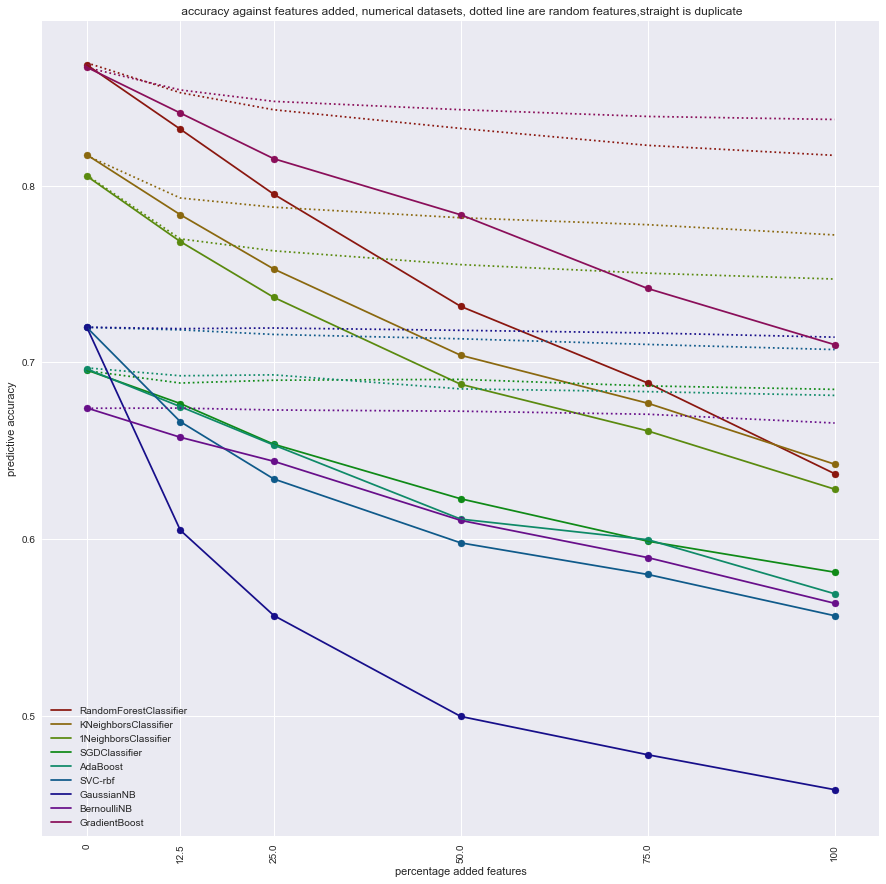

In [43]:
didList = NonCat
for did in Cat:
    didList.append(did)
scores = []
scores2 = []
amountList = [0.125,0.25,0.5,0.75,1]
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        score2 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) or not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            score2.append(read_features(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
        scores[i].append(score1)
        scores2[i].append(score2)
score1 = []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    score3.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
            score3[j][0] = score3[j][0] + (scores2[k][j][i][0])/(len(didList)*len(amountList))
            score3[j][i+1] = score3[j][i+1] + (scores2[k][j][i][1])/len(didList)
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' accuracy against features added, numerical datasets, dotted line are random features,straight is duplicate' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i],ls = ':')
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
    _=ax.plot(amountList, score3[i], color = cl[i],ls = ':')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(15)
fig.set_figwidth(15)
_=ax.legend()
plt.show()
listNumA = []
listNumA2 = []
for x,i in enumerate(score2):
    listNumA.append(i[0]-i[len(i)-1])
    listNumA2.append(score3[x][0]-score3[x][len(i)-1])
listNumAR = []
listNumAR2 = []
for z,i in enumerate(score2):
    listNumAR.append(0)
    listNumAR2.append(0)
    for x,j in enumerate(i):
        if x > 0:
            listNumAR[z] = listNumAR[z] + (i[x-1]-i[x])/(x_axis[x]-x_axis[x-1])
            listNumAR2[z] = listNumAR2[z] + (score3[z][x-1]-score3[z][x])/(x_axis[x]-x_axis[x-1])
    listNumAR[z] = listNumAR[z]/len(amountList)*x_axis[x]
    listNumAR2[z] = listNumAR2[z]/len(amountList)*x_axis[x]

## Feature addition to numerical and categorical datasets
From the total amount of features a uniformly random selection is made and the selected features are added to the dataset. So for a dataset of 100 features, when there are 25% added features, 25 uniformly random numbers between 0 and 100 are made and the features corresponding to that number in the feature list is added to the dataset, giving a dataset of 125 features.
### Analysis
The randomforestclassifier and gradientBoostingClassifier have the best initial performance, but RandomForestClassifier shows a steeper slope.
The impact of the added features to the randomForestClassifier does not seem obvious as there is no change in the orginal features. The impact of the added feature maybe only because the forest is limited by the default hyperparameters in the amount of tree. This means that it takes longer to randomly find the best features and will settle with less important features.

The gradientboostingclassifier has a less steep decline than randomforest but this seems only because the default values of randomforest are lower than those of GradientBoostingClassifier with respect to n_estimators. We can compare them considering they are both using trees.

The same may hold for the KNeighborsClassifier but it does not explain the Classifier with only 1 Neighbor, I have not figured out what explains this behaviour. It can be a result of the calculation of closest neibhor which can be distorted by the duplicate features.

The GuassianNB has the worst results with the added features.
The BernoulliNB has the least steep decline in performance but it performed only average. The decline can be explained by bad features being impacting the performance. 
Adaboost,SVC-rbf and SGDClassifier show similar results, the ensembles are influenced like the RandomForestClassifier. All three show only average results with the default parameters. SVC-rbf does show a great result on the initail categorical dataset but then falls in line close to the ensembles with 50% added features

### Analysis with random add features
The added numerical features are just a uniformly random distribution between 0 and 1. The categorical features are uniformly random distribution of(0,1,2,3). 
When we compare the performance drops between the amount of added features there is a clear difference, the performance doesn't drop as hard with the random features. This means that the classifiers can better identify these added features as worse than the duplicate features. The Kneighorsclassifiers does have a drop at the beginningf in numerical datasets but it only seems as the addition of the random features and the dependency on all features.  This does not hold for the categorical features where the opposite is true. Where the categorical features added have a positive effect for the prediction accuracy. This can be explained as the categorical features randomness can make the possible neighbors better. After further inspection this only holds for certain datasets, 
For the other classifiers no significant difference can be measured between added random features and the clean dataset. This means that these classifiers: BernoulliNB, GaussianNB, SGDClassifier, AdaBoost and SVC-rbf; can correctly identify the random features as insignificant.

In [6]:
glist = [listCatA,listNumA,listCatA2,listNumA2]
resultsNP = np.array(glist)
df = pd.DataFrame(resultsNP.reshape(len(glist),len(listCatA)),
                  columns=clfNames,index=['categorical datasets','numerical datasets','categorical datasets random features','numerical datasets random features'])
pd.options.display.float_format = '{:.2f}'.format
df


# glist = [listCatA,listNumA]
# resultsNP = np.array(glist)
# gf = pd.DataFrame(resultsNP.reshape(len(glist),len(list3)),
#                   columns=clfNames,index=['categorical datasets','numerical datasets'])
# gf

,RandomForestClassifier,KNeighborsClassifier,1NeighborsClassifier,SGDClassifier,...,SVC-rbf,GaussianNB,BernoulliNB,GradientBoost
categorical datasets,0.21,0.14,0.12,0.08,...,0.20,0.18,0.09,0.14
numerical datasets,0.25,0.20,0.22,0.13,...,0.13,0.32,0.12,0.17
categorical datasets random features,0.08,0.00,0.01,0.01,...,0.02,0.01,0.02,0.05
numerical datasets random features,0.03,0.07,0.09,0.01,...,0.01,-0.00,0.00,0.01


In [7]:
glist = [listCatAR,listNumAR,listCatAR2,listNumAR2]
resultsNP = np.array(glist)
df2 = pd.DataFrame(resultsNP.reshape(len(glist),len(listCatAR)),
                  columns=clfNames,index=['cat datasets averaged','num datasets averaged','cat datasets random features averaged','num datasets random features averaged'])
pd.options.display.float_format = '{:.2f}'.format
df2

,RandomForestClassifier,KNeighborsClassifier,1NeighborsClassifier,SGDClassifier,...,SVC-rbf,GaussianNB,BernoulliNB,GradientBoost
cat datasets averaged,0.19,0.13,0.10,0.08,...,0.20,0.17,0.08,0.14
num datasets averaged,0.22,0.18,0.20,0.12,...,0.14,0.36,0.10,0.14
cat datasets random features averaged,0.08,-0.01,0.01,0.01,...,0.02,0.01,0.01,0.06
num datasets random features averaged,0.03,0.09,0.10,0.01,...,0.01,-0.00,0.00,0.01


### Error slope
calculated from the predictive accuracy difference between measured intances.

For the categorical dataset RandomForestClassifier is clearly not resilient to the duplicated features and either BernoulliNB or SGDClassifier is the most resilient.
For the numerical datasets GaussianNB is the least resilient with again BernoulliNB being the most resilient, but now closely followed by AdaBoost and SVC-rbf. They are still the weakest classifiers with the least predictive accuracy unoptimized. 

The lines however do not seem completely linear so it is depended on the amount of features added. This is 100% added features in this case.

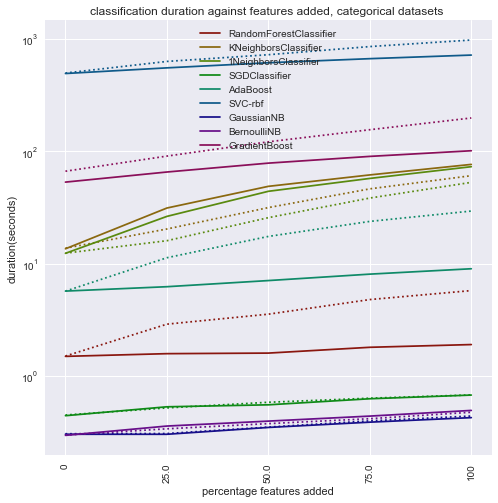

In [11]:
didList = Cat
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
dur1 = []
dur2 = []
dur3 = []
typ = 0
fig, ax = plt.subplots()
amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))


cl = sns.hls_palette(len(dur2), l=.3, s=.8)
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, categorical datasets ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

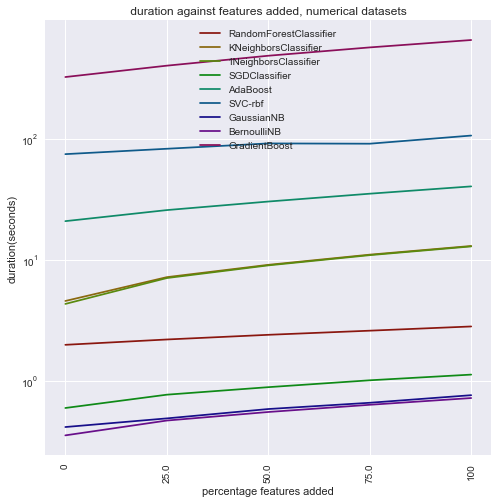

In [12]:
func = 'cvScoreFeatures5'
didList = NonCat
dur1 = []
dur2 = []
typ = 0
fig, ax = plt.subplots()
amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
    dur2[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))

cl = sns.hls_palette(len(dur2), l=.3, s=.8)
amountList = [0,0.25,0.5,0.75,1] 
for i,x in enumerate(amountList):
    amountList[i] = x*100
x_axis = amountList
for i in range(0,len(dur2)):
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' duration against features added, numerical datasets ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

### analysis categorical and numerical classification prediction duration
On this logscale most classifier do not have a significant change in duration. 
In particular RandomForestClassifier seems nearly unaffacted by the feature addition. This can be explained by no increase in n_neighbors and so the algorithm making the same size tree only with more features to check.
The KneighborsClassifier also show little difference between a single neighbor and the default setting of 5 neighbors with categorical datasets. The difference is a bit more noticable with the categorical datasets
The lines are also a bit more steeper with the categorical datasets.
The steepest curve seems to be from the KNeighborsClassifier which has a steep increase with the 25% added features and then afterwards increases steadily.
When you compare the results of duplicate with random features, most classifiers have increase durations, however KNeighborsClassifer has a lower duration increase. This can be explained by only three categorical categories for added features. The original features have more categories which can explain more computation. 
For the randomForestClassifier there is a large increase in duration this can be explained by the variance or noise depending on how you see it. The features have no inherent predicting capabilities so finding them can be the luck of the draw. This means that the RandomForestClassifier is trying to find something that is no there. 

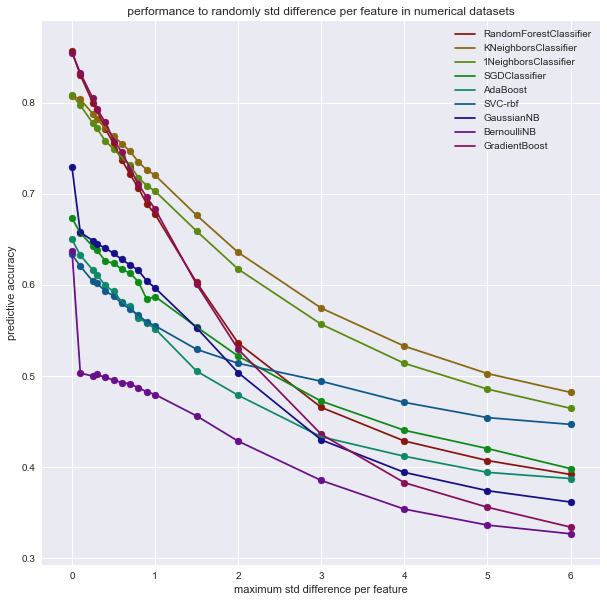

In [111]:
func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2
fig, ax = plt.subplots()
_=plt.title(' performance to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
#     _=ax.plot(amountList,approx[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()
listNum = []
for x,i in enumerate(score2):
    listNum.append(i[0]-i[len(i)-1])
listNumR = []
for z,i in enumerate(score2):
    listNumR.append(0)
    for x,j in enumerate(i):
        if x > 0:
            listNumR[z] = listNumR[z] + (i[x-1]-i[x])/(x_axis[x]-x_axis[x-1])
    listNumR[z] = listNumR[z]/len(amountList)*x_axis[x]

## std difference per feature
for each feature the standard deviation(std) is calculated and there is a 50% change to add and a 50% to decrease the feature by a value. This value is uniformly picked between 0 and the maximum std difference for the specific feature. In short(+/- random*amount*std)

### Analysis 
Here similair results are observed as with increased features but the drops are mostly greater, Except for GaussianNB.
Here RandomForestClassifier drops significantly as seems obvious as the features can fall outside the pre calculated estimators. #TODO edit gradientboostingclassifier## 
The KneighborClassifier have a slow descent which can be explained as the featuers slowly getting out of range of their 'neighbor' features. The 1 neighbor and 5 neighbors have similair results and the single neighbor classifier is greater impacted by the std difference. 
The drop of performance of Gaussian can be attributed to the features getting out of range of the calculated variance 
The sudden drop in performance of Bernoulli is of the boolean convertion of features which seems to highly impact it. We can consider it to be close to things like a hash function as a small difference means a whole different value. 
Both ensembles(SGD and Adaboost) have a smilair slope to the KNeighborsClassifier. This can be explained by mediocre initial results accuracy and with the combining of models the difference can be less impactful.

### General analysis
The performance of the algorithms not converting to random guessing can be explained by the datasets for example not having a normal distribution. Additionally Medical datasets can have a large variance falling outside of the range of multiple standard deviations.

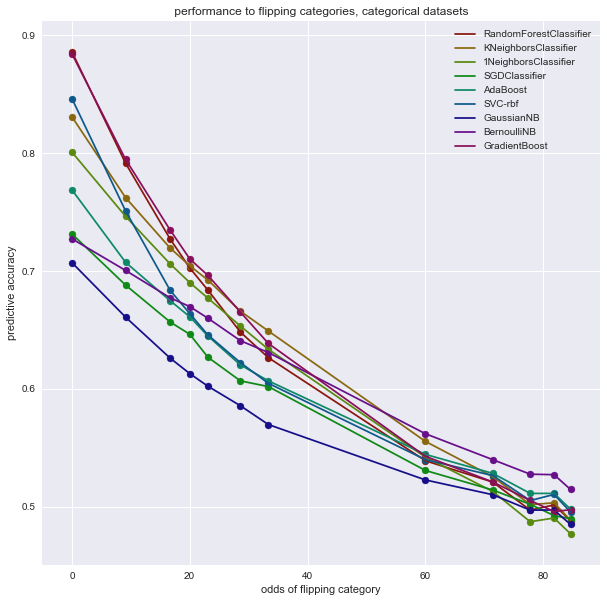

In [17]:
func = 'cvfeatureCAT2'
scores = []
amountList = [0.5,0.6,0.7,0.75,0.8,0.9,1,2,3,4,5,6]
didList = [3,20, 21, 26, 333, 334, 335, 40668, 4135, 4534, 469, 46, 50]
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][i] = score2[j][i] + (scores[k][j][i][1])/len(didList)
flipped = []
for i in amountList:
    if i > 0.5:
        flipped.append((1-1/(i+0.5))*100)
    else:
        flipped.append(0)
x_axis = flipped
fig, ax = plt.subplots()
_=plt.title(' performance to flipping categories, categorical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('odds of flipping category')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()
listCat = []
for x,i in enumerate(score2):
    listCat.append(i[0]-i[len(i)-1])
listCatR = []
for z,i in enumerate(score2):
    listCatR.append(0)
    for x,j in enumerate(i):
        if x > 0:
            listCatR[z] = listCatR[z] + (i[x-1]-i[x])/(x_axis[x]-x_axis[x-1])
    listCatR[z] = listCatR[z]/len(amountList)*x_axis[x]

## flipping categories
a balance is made of the occurence of categories per feature. For each feature a uniformly random number is chosen between 0 and 100 and when the number is lower than the 'odds of flipping', the feature is overwritten by a randomly chosen category from the category distribution calculated at the start. 

### Analysis of categorical dataset
Here again the randomForestClassifier falls the hardest. Which can be explained by the overwritten features now having no relation with the previous feature value. This means that previous important features can be irrelevant.
The KNeighborsClassifier get a smaller impact as they are more dependent on multiple features and will drop down more gradually.
SVC-rbf has better starting results than with numerical datasets but also falls harder with the changes, as can be contritubed to the dependency on all features at the same time with weights.(not like k neighbor classifier which spread the outcome uniformly over all features by default.)
BernoulliNB shows promosing results with a less steep decling and greatest performance on the worst set(more than 60% flipped categories).

#### General analysis
near the 80% mark a small increase can be noticed with every classifier this can be explained by the sheer randomness of the features at that point,
The results  combining together around 0.5, can be explained by the Majority class guessing giving around 0.44 accuracy, which is likely considering the dataset is already 80% noise.

In [15]:
glist = [listCat,listCatR,listNum,listNumR]
resultsNP = np.array(glist)
df = pd.DataFrame(resultsNP.reshape(len(glist),len(listCat)),
                  columns=clfNames,index=['categorical datasets','categorical datasets averaged','numerical datasets','numerical datasets averaged'])
df

,RandomForestClassifier,KNeighborsClassifier,1NeighborsClassifier,SGDClassifier,...,SVC-rbf,GaussianNB,BernoulliNB,GradientBoost
categorical datasets,0.40,0.34,0.32,0.24,...,0.35,0.22,0.21,0.39
categorical datasets averaged,0.39,0.32,0.30,0.23,...,0.35,0.23,0.20,0.36
numerical datasets,0.32,0.17,0.19,0.15,...,0.12,0.23,0.21,0.33
numerical datasets averaged,0.34,0.18,0.20,0.16,...,0.14,0.25,0.27,0.34


### Error slope analysis
Above the error slope can be observed for the studied classifiers, now you can clearly see that RandomForestClassifier has the steepest decline in quality.
The flipping categories can also be observed to have a larger impact for the randomForestClassifier, which seems obvious considering you cannot distinguish the feature anymore and with the numerical datasets the feature can still be distinguishable close.
It must also be noted that these slopes are only considering the current range of studied cases and are not scaled to the addition or flipping. (Numerical dataset addition of std to a maximum of 6* std and for categorical features till 80% flipped.
When we compare the averaged with the total we can also observe the larger impact on numerical datasets compared to categorical datasets. For the categorical datasets there is a gradual decline which explains that the averaged is close to the overall.
For numerical datasets the decline is steeper at the beginning and becomes gradual afterwards.

In [8]:
amountList = [1.5]
didList = NonCat
func = 'cvfeatureSTD1'
for i,did in enumerate(didList):
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)

In [25]:
np.polyfit(x_axis, np.log(score2[0]), 1)

array([-0.133, -0.253])

In [26]:
def funcs(ab,x):
    return ab[0]* np.log(x) + ab[1]

In [78]:
approx = []
for j,x in enumerate(clfNames):
    approx.append([])
    for i in amountList:
        approx[j].append(1+funcs(np.polyfit(x_axis, np.log(score2[j]), 1),i))

In [29]:
from sklearn.linear_model import Ridge
ridges = []
for j,clfName in enumerate(clfNames):
    ridges.append(Ridge().fit(np.array(amountList).reshape(-1,1),np.log(score2[j][1:])))
approx = []
for j,x in enumerate(clfNames):
    approx.append(ridges[j].predict(np.array(amountList).reshape(-1,1)))
for i,x in enumerate(approx):
    for j,x2 in enumerate(approx[i]):
        approx[i][j] = math.e**x2

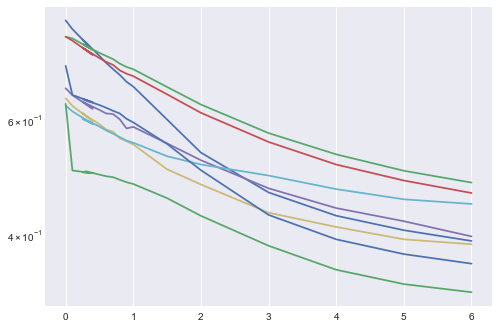

In [83]:
fig, ax = plt.subplots()
for i,x in enumerate(score2):
    plt.plot(x_axis,x)
ax.set_yscale("log", nonposy='clip')

plt.show()

In [15]:
from LocalDatasets import readDict
listFeatures = []
listInstances = []
listMult = []
list1 = []
for did in NonCat:
    if readDict(did)['NumberOfFeatures'] < 11:
        list1.append(did)
    listFeatures.append(readDict(did)['NumberOfFeatures'])
    listInstances.append(readDict(did)['NumberOfInstances'])
    listMult.append(readDict(did)['NumberOfFeatures']*readDict(did)['NumberOfInstances'])

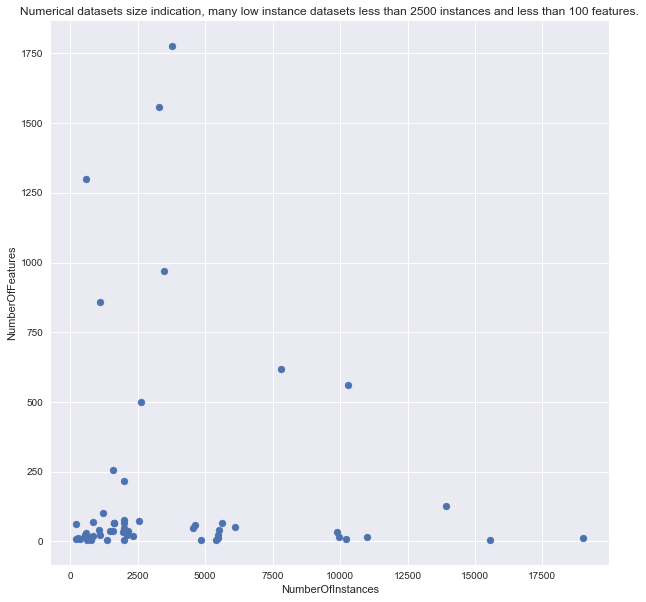

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(listInstances,listFeatures)
plt.xlabel('NumberOfInstances')
plt.ylabel('NumberOfFeatures')
fig.set_figheight(10)
fig.set_figwidth(10)
plt.title('Numerical datasets size indication, many low instance datasets less than 2500 instances and less than 100 features.')
plt.show()

In [25]:
from LocalDatasets import readDict
listFeatures = []
listInstances = []
listMult = []
list1 = []
for did in Cat:
    if readDict(did)['NumberOfFeatures'] < 11:
        list1.append(did)
    listFeatures.append(readDict(did)['NumberOfFeatures'])
    listInstances.append(readDict(did)['NumberOfInstances'])
    listMult.append(readDict(did)['NumberOfFeatures']*readDict(did)['NumberOfInstances'])

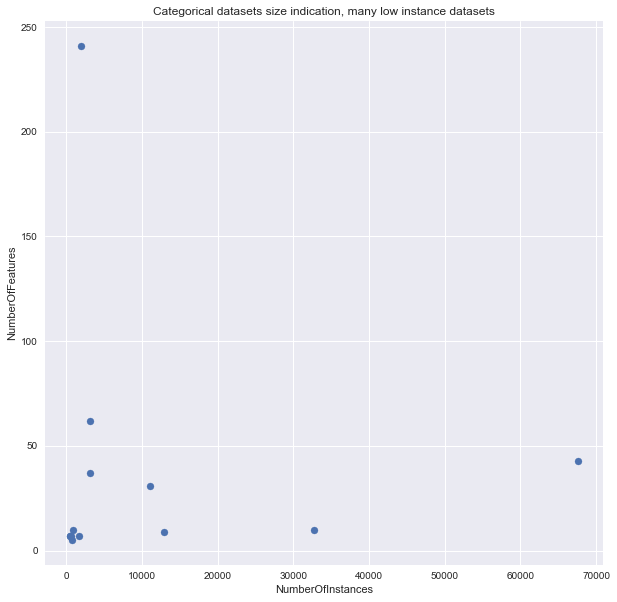

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(listInstances,listFeatures)
plt.xlabel('NumberOfInstances')
plt.ylabel('NumberOfFeatures')
fig.set_figheight(10)
fig.set_figwidth(10)
plt.title('Categorical datasets size indication, many low instance datasets')
plt.show()

## The distribution of the used datasets
These graphs do not tell much about the used datasets but may indicate skewed results, considering all results are averaged, so small datasets have as much impact as large datasets. Some datasets also seem to small as errors where raised of having only 1 class in the training set, the results of such experiments are discarded and in the future such datasets may be excluded from the whole as they are unrelaible to do cross validation on.

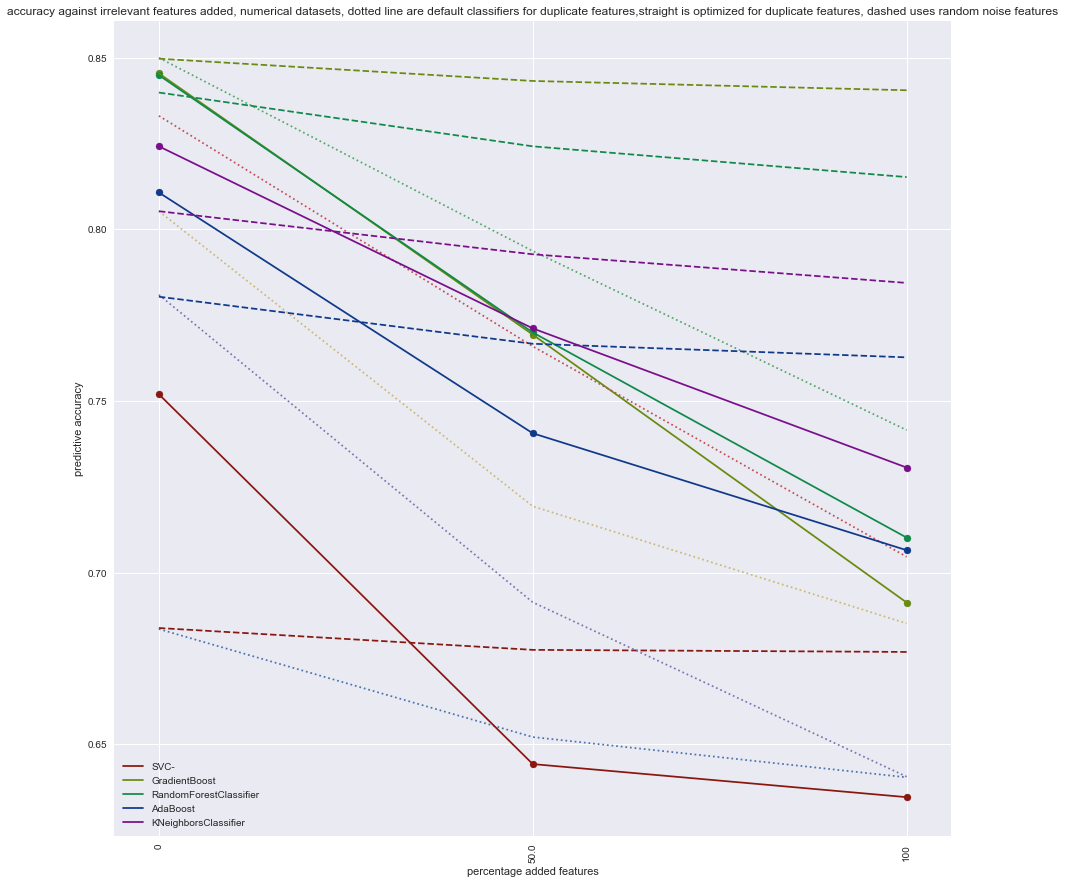

In [3]:
didList = [11,
 1038,
 1043,
 1049,
 1050,
 37,
 1063,
 39,
 40,
 41,
 1067,
 1068,
 40496,
 53,
 54,
 1464,
 1467,
 40509,
 458,
 1510,
 1515]
clfNames = ['SVC-','GradientBoost','RandomForestClassifier', 'AdaBoost','KNeighborsClassifier']
# clfNames = ['RandomForestClassifier', 'AdaBoost','KNeighborsClassifier']
scores = []
scores2 = []
scores3 = []
amountList = [0.5,1]
func = 'cvScoreFeatures5'
func2 = 'cvOptScoreFeatures5'
func3 = 'cvScoreFeatures4'
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    scores3.append([])
    for clfName in clfNames:        
        score1 = []
        score2 = []
        score3 = []
        for amount in amountList:            
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)            
            score2.append(read_features(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            if clfName == 'SVC-':
                clfName = 'SVC-rbf'
                if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                    print(func,clfName,amount,did)
                score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
                if not checkForExist(func3,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                    print(func3,clfName,amount,did)
                score3.append(read_features(func3,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
                clfName = 'SVC-'
            else:
                score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
                score3.append(read_features(func3,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
        scores[i].append(score1)
        scores2[i].append(score2)
        scores3[i].append(score3)
score1 = []
score2 = []
score3 = []
score4 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    score3.append([0 for i in range(len(amountList)+1)])
    score4.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
            score3[j][0] = score3[j][0] + (scores2[k][j][i][0])/(len(didList)*len(amountList))
            score3[j][i+1] = score3[j][i+1] + (scores2[k][j][i][1])/len(didList)
            score4[j][0] = score4[j][0] + (scores3[k][j][i][0])/(len(didList)*len(amountList))
            score4[j][i+1] = score4[j][i+1] + (scores3[k][j][i][1])/len(didList)
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title('accuracy against irrelevant features added, numerical datasets, dotted line are default classifiers for duplicate features,straight is optimized for duplicate features, dashed uses random noise features' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i],ls = ':')
    _=ax.plot(x_axis, score2[i],ls = ':')
    _=ax.scatter(x_axis, score3[i], color = cl[i])
    _=ax.plot(amountList, score3[i], color = cl[i],label=clfNames[i])
    _=ax.plot(amountList, score4[i], color = cl[i],ls = '--')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(15)
fig.set_figwidth(15)
_=ax.legend()
plt.show()

## Analysis optimization for redudant features
Initial results of the optimization show that there is still a decline in performance. The decline in the SVC and GradientBoostingClassifier is even greater than the unoptimized result. The Optimization also does not favor the result of gradientboostingclassifier as it has worse results than non optimized in most cases. RandomForestClassifier, KNeighborsClassifier and AdaBoostClassifier do perform better than non-optimized but still decline steadily.

If the classifiers cannot overlook these duplicate features then that means that, feature selection is a valuable option to improve classifiers. (this can be disputed by using the results of the irrelevant features, which in some cases improved the results of the classification. a second option can be using something like PCA to merge the features and see if we can get similair results.)

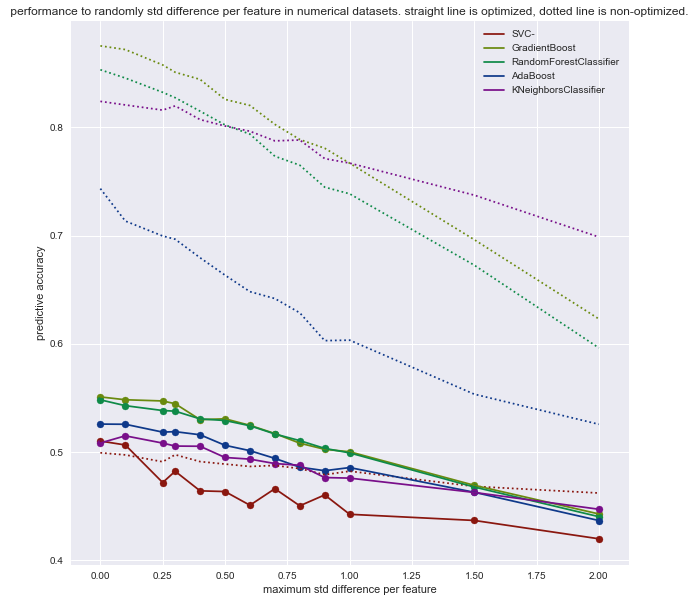

In [78]:
func = 'cvOptimizeSTD'
func2 = 'cvfeatureSTD1'
clfNames = ['SVC-','GradientBoost','RandomForestClassifier', 'AdaBoost','KNeighborsClassifier']
didList = [54,458,1043,1510,1515]
didList = [11,12,37,54,458,1038,1043,1046,1049,1050,1063,1067,1068,1120,1176,1459,1462,1464,1466,1467,1468,1510,1515]
didList = [11,12,37,54,458,1038,1043]
# didList = [1510]
scores = []
scores2 = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2] #,3,4,5,6]
# didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        score2 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
            if clfName == 'SVC-':                
                clfName = 'SVC-rbf'
                if not checkForExist(func2,clfName,did,amount):
                    print(func2,clfName,amount,did)
                score2.append(read_features(func2,clfName,did,amount))
                clfName = 'SVC-' 
            else:
                if not checkForExist(func2,clfName,did,amount):
                    print(func2,clfName,amount,did)
                score2.append(read_features(func2,clfName,did,amount))
        scores[i].append(score1)
        scores2[i].append(score2)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    score3.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
            score3[j][0] = score3[j][0] + (scores2[k][j][i][0])/(len(didList)*len(amountList))
            score3[j][i+1] = score3[j][i+1] + (scores2[k][j][i][1])/len(didList)
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2
fig, ax = plt.subplots()
_=plt.title(' performance to randomly std difference per feature in numerical datasets. straight line is optimized, dotted line is non-optimized. ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score3[i], color = cl[i],ls = ':' )
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
#     _=ax.plot(amountList,approx[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()
listNum = []
for x,i in enumerate(score2):
    listNum.append(i[0]-i[len(i)-1])
listNumR = []
for z,i in enumerate(score2):
    listNumR.append(0)
    for x,j in enumerate(i):
        if x > 0:
            listNumR[z] = listNumR[z] + (i[x-1]-i[x])/(x_axis[x]-x_axis[x-1])
    listNumR[z] = listNumR[z]/len(amountList)*x_axis[x]


### analysis optimization for std difference impact
These results show a large overfitting issue as only SVC predicts better optimized than non optimized.
The rest of the classifiers do not drop below their non optimized counterpart. In this case its again the KNeighborsClassifier who is most resistent.
The datasets do not favor SVC as the default hyperparameters are just randomly guessing only the optimized version does an attempt at prediciting other classes. 

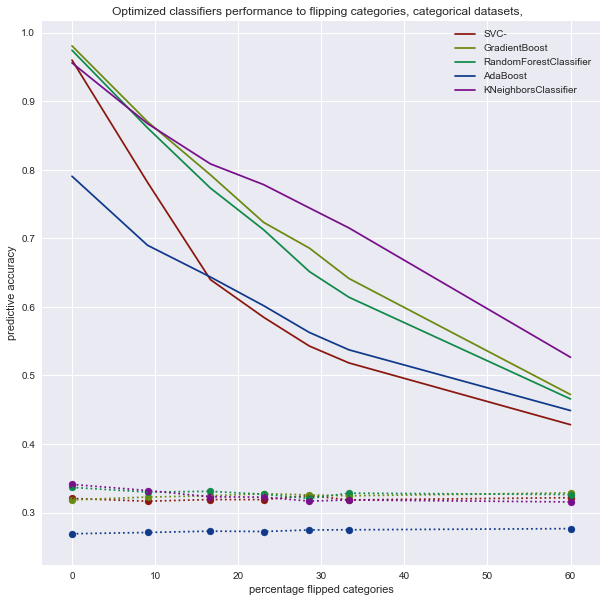

In [74]:
func = 'cvOptimizeSTD'
func2 = 'cvfeatureCAT2'
clfNames = ['SVC-','GradientBoost','RandomForestClassifier', 'AdaBoost','KNeighborsClassifier']
# clfNames = ['GradientBoost','RandomForestClassifier', 'AdaBoost','KNeighborsClassifier']
scores = []
scores2 = []
amountList = [0.6,0.7,0.8,0.9,1,2] #,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
didList = [3,20,21,26]
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        score2 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
            if clfName == 'SVC-':
                clfName = 'SVC-rbf'
            if not checkForExist(func2,clfName,did,amount):
                print(func2,clfName,amount,did)
            score2.append(read_features(func2,clfName,did,amount))
            if clfName == 'SVC-rbf':
                clfName = 'SVC-'
        scores[i].append(score1)
        scores2[i].append(score2)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    score3.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
            score3[j][0] = score3[j][0] + (scores2[k][j][i][0])/(len(didList)*len(amountList))
            score3[j][i+1] = score3[j][i+1] + (scores2[k][j][i][1])/len(didList)
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
flipped = [0]
for i in amountList:
    if i > 0.5:
        flipped.append((1-1/(i+0.5))*100)
    else:
        flipped.append(0)
x_axis = flipped
# x_axis = amountList2
fig, ax = plt.subplots()
_=plt.title('Optimized classifiers performance to flipping categories, categorical datasets,  ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
#     _=ax.plot(x_axis[1:], score1[i], color = cl[i])
    
    _=ax.plot(x_axis, score2[i], color = cl[i],ls = ':')
    _=ax.plot(x_axis, score3[i], color = cl[i],label=clfNames[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
#     _=ax.plot(amountList,approx[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage flipped categories')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()
listNum = []
for x,i in enumerate(score2):
    listNum.append(i[0]-i[len(i)-1])
listNumR = []
for z,i in enumerate(score2):
    listNumR.append(0)
    for x,j in enumerate(i):
        if x > 0:
            listNumR[z] = listNumR[z] + (i[x-1]-i[x])/(x_axis[x]-x_axis[x-1])
    listNumR[z] = listNumR[z]/len(amountList)*x_axis[x]

### Analysis flipping categories
The small sample size does not show great difference between classifiers KNeighbors, Gradient and RandomForest.
The most difference is between AdaBoost and SVC who profit the most from the optimization.
The spike in performance in SVC can be explained by the small dataset 20 which most likely did not change that much as the flipping categories can stay the same or not at all as they are randomly picked from a uniform random sample.

In [34]:
listie = [11,
 1038,
 1043,
 1049,
 1050,
 37,
 1063,
 39,
 40,
 41,
 1067,
 1068,
 40496,
 53,
 54,
 1464,
 1467,
 40509,
 458,
 1510,
 1515]
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
clfNames = ['SVC-','GradientBoost','RandomForestClassifier', 'AdaBoost','KNeighborsClassifier']
func = 'cvScoreFeatures5'
func2 = 'cvOptScoreFeatures5'

typ = 0
amountList = [0.5,1] 
multiplier = []
for i in clfNames:
    multiplier.append([])
for joke in listie:
    dur1 = []
    dur2 = []
    dur3 = []
    for i,x in enumerate(clfNames):
        dur1.append([]) 
        dur2.append([])
        dur3.append([])
        for j,x in enumerate(amountList):
            dur1[i].append(0) 
            dur2[i].append(0)
            dur3[i].append(0)
        dur2[i].append(0)
        dur3[i].append(0)
    didList = [joke]
    for did in didList:
        for cs,clfName in enumerate(clfNames):
            for i,amount in enumerate(amountList):
                if clfName == 'SVC-':
                    clfName = 'SVC-rbf'
                if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                    print(func,clfName,amount,did)                
                dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
                dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
                dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
                dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
                dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
                dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
                if clfName == 'SVC-rbf':
                    clfName = 'SVC-'
                dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
                dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
                dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
                dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))

    for i,x in enumerate(dur2):
        multiplier[i].append(np.array(dur3[i])/np.array(dur2[i]))

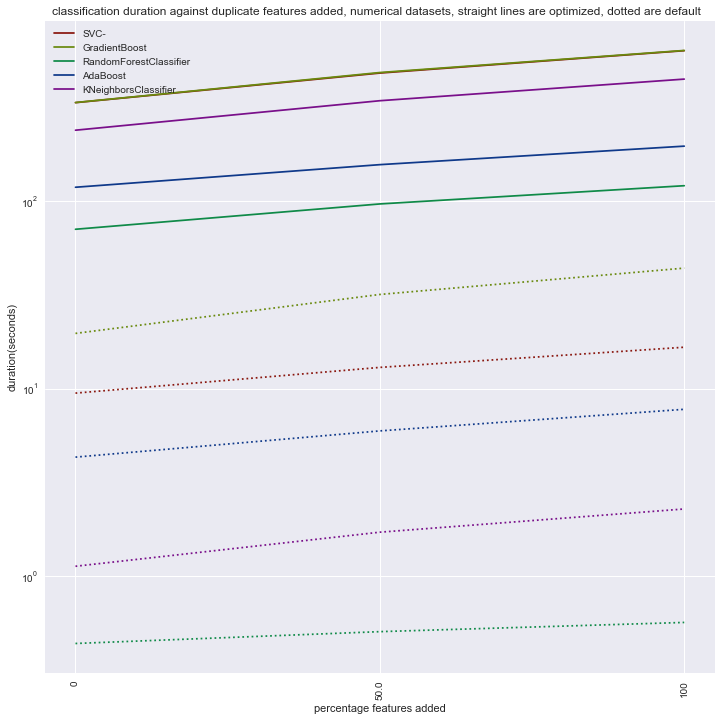

In [41]:
#print duration increase
didList = [11,
 1038,
 1043,
 1049,
 1050,
 37,
 1063,
 39,
 40,
 41,
 1067,
 1068,
 40496,
 53,
 54,
 1464,
 1467,
 40509,
 458,
 1510,
 1515]
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
clfNames = ['SVC-','GradientBoost','RandomForestClassifier', 'AdaBoost','KNeighborsClassifier']
func = 'cvScoreFeatures5'
func2 = 'cvOptScoreFeatures5'
dur1 = []
dur2 = []
dur3 = []
typ = 0
fig, ax = plt.subplots()
amountList = [0.5,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if clfName == 'SVC-':
                clfName = 'SVC-rbf'
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)                
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            if clfName == 'SVC-rbf':
                clfName = 'SVC-'
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            


cl = sns.hls_palette(len(dur2), l=.3, s=.8)
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],ls = ':' )
    _= ax.plot(x_axis,dur3[i], color = cl[i],label = clfNames[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against duplicate features added, numerical datasets, straight lines are optimized, dotted are default  ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(12)
fig.set_figwidth(12)
ax.set_yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

### analysis duration increase
Gradient and SVC are overlapping as having nearly the same duration when optimizing. 

Most notable is the exponential increase of KNeighborsClassifier compared to the others as it overtakes AdaBoost in time and is nearing the time of GradientBoost and SVC. This increase can be explained as the optimizer increasing n_neighbors or the distance calculation mechanic.

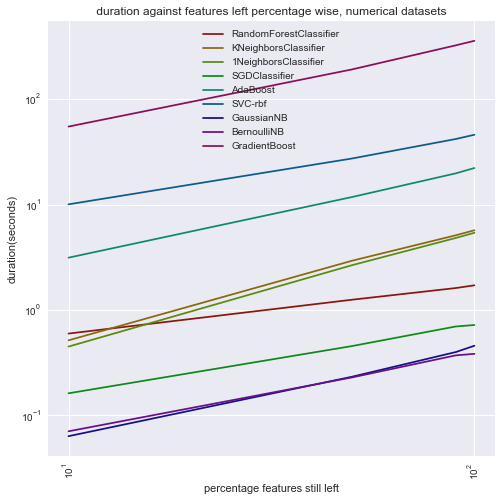

In [3]:
listDone = []
for did in NonCat:
    if readDict(did)['NumberOfFeatures'] > 30 and readDict(did)['NumberOfInstances'] < 100000:
        listDone.append(did)
func = 'removedFeatures'
didList = listDone
dur1 = []
dur2 = []
typ = 0
fig, ax = plt.subplots()
amountList = [0.1,0.5,0.9] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
    dur2[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))

cl = sns.hls_palette(len(dur2), l=.3, s=.8)
amountList = [1,0.9,0.5,0.1]
for i,x in enumerate(amountList):
    amountList[i] = x*100
x_axis = amountList
for i in range(0,len(dur2)):
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' duration against features left percentage wise, numerical datasets ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage features still left')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

#### duration 
Duration is calculated as classification and prediction time combined.
### Analysis duration features removed
For all classifiers a clear increase can be seen, but remarkable is the only slight increase for RandomForestClassifier as opposed to KNeighborsClassifier. This can be the influx of the features has a great effect on the prediction for KNeighborsClassifer as it has to make greater calculations 

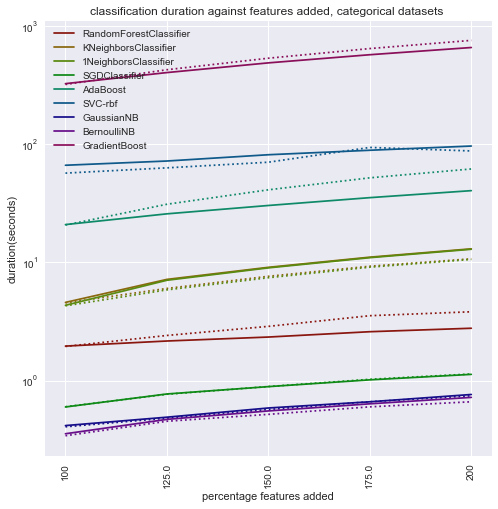

In [4]:
didList = NonCat
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
dur1 = []
dur2 = []
dur3 = []
typ = 0

amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))


cl = sns.hls_palette(len(dur2), l=.3, s=.8)
for i,x in enumerate(amountList):
    amountList[i] = x*100 + 100
amountList2 = copy(amountList)
amountList.insert(0,100)
x_axis = amountList
fig, ax = plt.subplots()
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, categorical datasets ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

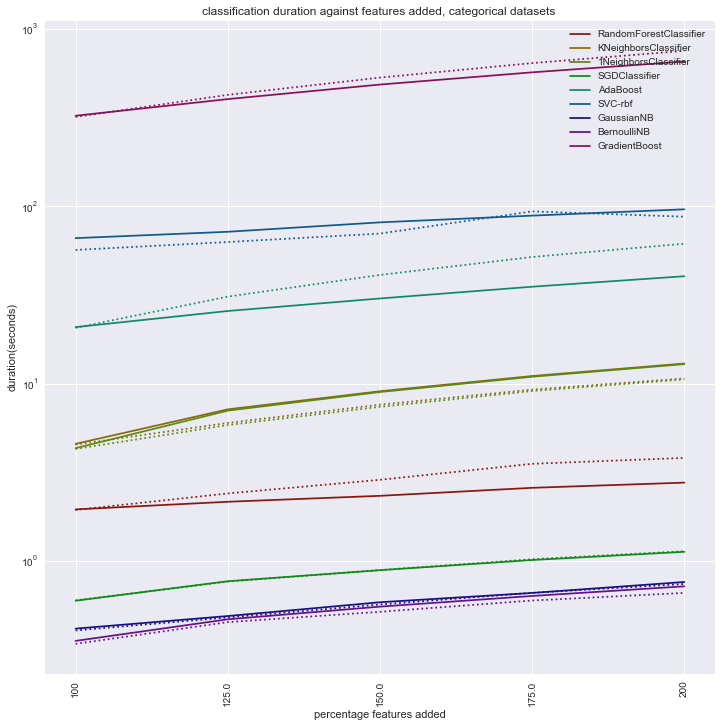

In [5]:

amountList = [0.25,0.5,0.75,1]
for i,x in enumerate(amountList):
    amountList[i] = x*100 + 100
amountList2 = copy(amountList)
amountList.insert(0,100)
x_axis = amountList
fig, ax = plt.subplots()
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, categorical datasets ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(12)
fig.set_figwidth(12)
ax.set_yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

In [54]:
clfName = 'SVC-rbf'
amountList = [0.25,0.5,0.75,1]
durats = []
didList = NonCat
for i in didList:
    durats.append([])
for zu,did in enumerate(didList):
    for amount in amountList:
        durats[zu].append(read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))

In [70]:
didList = [11,
 1038,
 1043,
 1049,
 1050,
 37,
 1063,
 39,
 40,
 41,
 1067,
 1068,
 40496,
 53,
 54,
 1464,
 1467,
 40509,
 458,
 1510,
 1515]
average = 0
for did in didList:
    average = average + readDict(did)['MajorityClassSize']/readDict(did)['NumberOfInstances']/len(didList)

In [115]:
listNumR = []
listCatAR2 = []
for z,i in enumerate(score2):
    listNumR.append([])
    listCatAR2.append([])
    for x,j in enumerate(i):
        if x > 0:
            listNumR[z].append((i[x-1]-i[x])/(x_axis[x]-x_axis[x-1]))

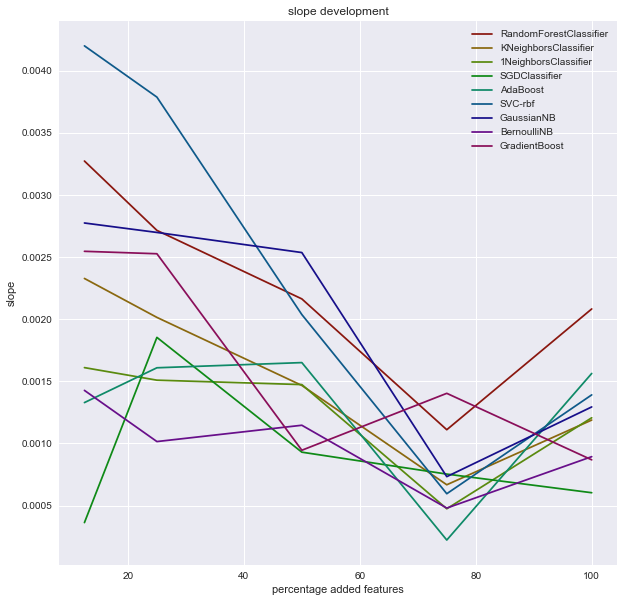

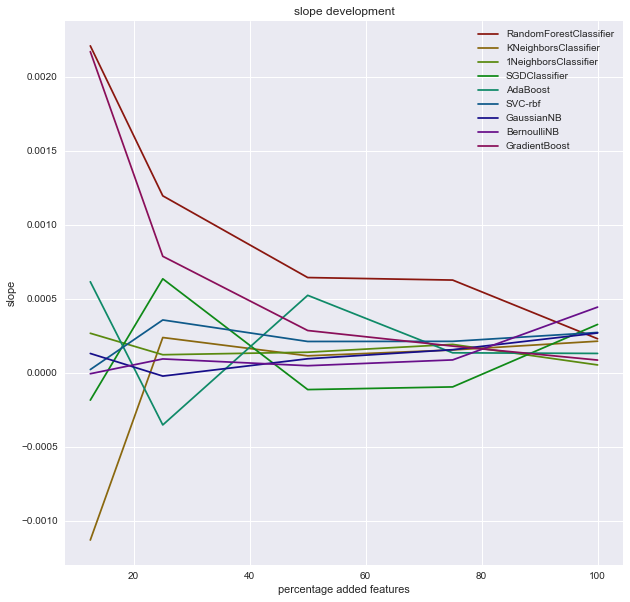

In [110]:
amountList = [12.5, 25.0, 50.0, 75.0, 100]
fig, ax = plt.subplots()
cl = sns.hls_palette(len(listCatAR), l=.3, s=.8)
for i,x in enumerate(listCatAR):
    ax.plot(amountList,x,label = clfNames[i],color= cl[i])
plt.xlabel('percentage added features')
plt.ylabel('slope')
plt.title('slope development for duplicate features')
fig.set_figheight(10)
fig.set_figwidth(10)
plt.legend()
plt.show()
fig, ax = plt.subplots()
cl = sns.hls_palette(len(listCatAR2), l=.3, s=.8)
for i,x in enumerate(listCatAR2):
    ax.plot(amountList,x,label = clfNames[i],color= cl[i])
plt.xlabel('percentage added features')
plt.ylabel('slope')
plt.title('slope development for noisey features')
fig.set_figheight(10)
fig.set_figwidth(10)
plt.legend()
plt.show()

### Analysis
SVC has the greatest slope and SGDClassifier the least, SVC is most effected by the duplicate features as opposed to the noisey features.
Here a clear problem can be seen with 75% added features as there is a dip in the slope for nearly all classifiers, expect GradientBoost which has some seperate run classifications. (###identify the datasets##)

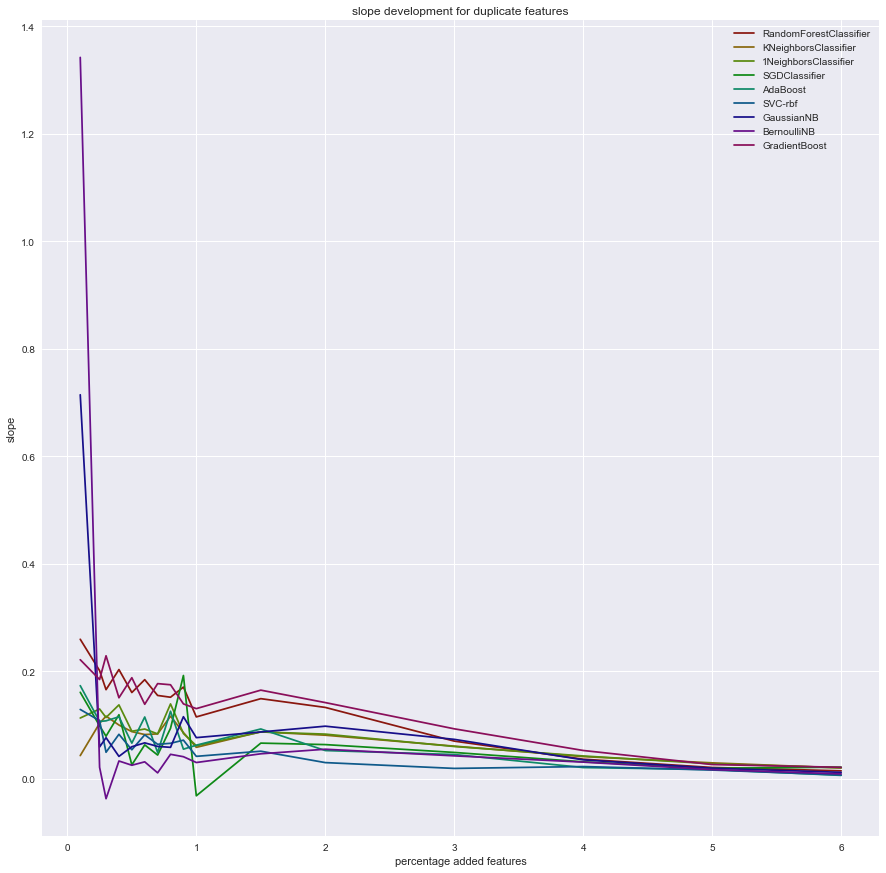

In [122]:
data = listNumR
fig, ax = plt.subplots()
cl = sns.hls_palette(len(data), l=.3, s=.8)
for i,x in enumerate(data):
    ax.plot(amountList,x,label = clfNames[i],color= cl[i])
plt.xlabel('added std to indivual dataset')
plt.ylabel('slope')
plt.title('slope development for duplicate features')
fig.set_figheight(15)
fig.set_figwidth(15)
# ax.set_yscale("log", nonposy='clip')
plt.legend()
plt.show()

### analysis
On first sight the large slopes of both NBs can be seen, just like in the other visual. Here you can also more clearly see sudden drops in the slope early on by BernounilliNB and SGDClassifier for SGD this means a large randomness in the classification for Bernoullie this appears after the sudden drop so it may be only a small difference.
At the end you can see a clear consencus between the classifiers as the slopes slow down


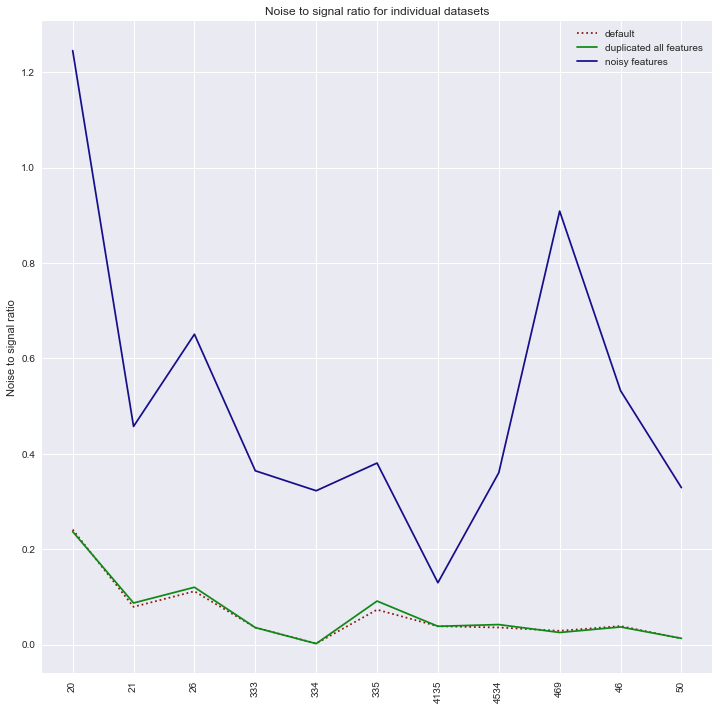

In [6]:
from LocalDatasets import read_did,read_did_cat,readDict
from metafeatures import information_theoretic_metafeatures
from Noise2 import add_copy,add_copy_features,add_noise_features2
from preamble import *
Cat = [20, 21, 26, 333, 334, 335, 4135, 4534, 469, 46, 50]
did = 46
x1 = []
x2 = []
x3 = []
for did in Cat:
    X,y = read_did(did)
    cat = read_did_cat(did)

    x1.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
    amount = readDict(did)['NumberOfFeatures'] - 1
    X = add_noise_features2(X,cat,amount) 
    for i in range(amount):
        cat.append(True)
    x3.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
    X,y = read_did(did)
    X = add_copy_features(X,amount)    
    x2.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation']) 
fig, ax = plt.subplots()
cl = sns.hls_palette(3, l=.3, s=.8)
x_axis =range(len(Cat))
_= ax.plot(x_axis,x1, color = cl[0],ls = ':' ,label = 'default')
_= ax.plot(x_axis,x2, color = cl[1], label = 'duplicated all features' )
_= ax.plot(x_axis,x3, color = cl[2], label = 'noisy features' )
_=plt.xticks(x_axis, Cat,rotation='vertical')
_=plt.title('Noise to signal ratio for individual datasets')
_=plt.ylabel('Noise to signal ratio')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(12)
fig.set_figwidth(12)
# ax.set_yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

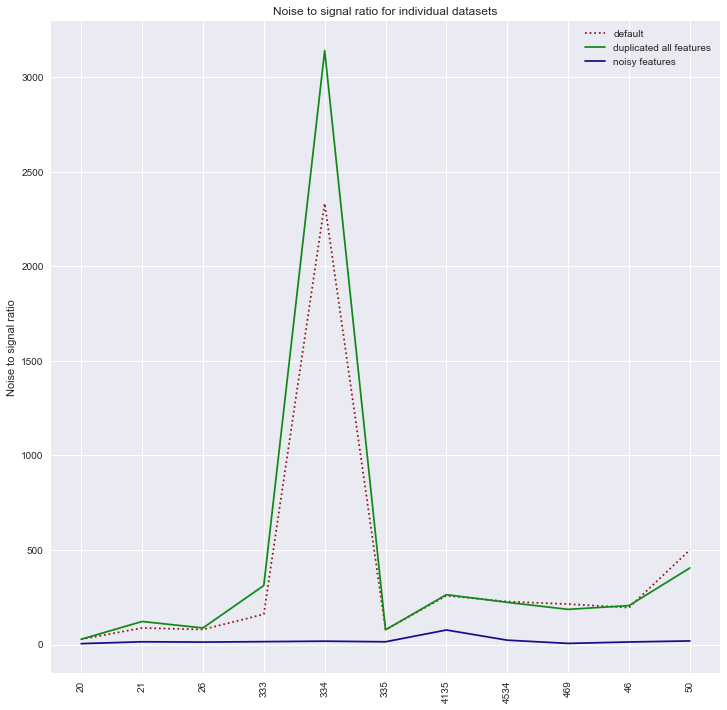

In [7]:
from LocalDatasets import read_did,read_did_cat,readDict
from metafeatures import information_theoretic_metafeatures
from Noise2 import add_copy,add_copy_features,add_noise_features2
from preamble import *
Cat = [20, 21, 26, 333, 334, 335, 4135, 4534, 469, 46, 50]
did = 46
x1 = []
x2 = []
x3 = []
info = 'NoiseToSignalRatio'
for did in Cat:
    X,y = read_did(did)
    cat = read_did_cat(did)

    x1.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)[info])
    amount = readDict(did)['NumberOfFeatures'] - 1
    X = add_noise_features2(X,cat,amount) 
    for i in range(amount):
        cat.append(True)
    x3.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)[info])
    X,y = read_did(did)
    X = add_copy_features(X,amount)    
    x2.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)[info])  
fig, ax = plt.subplots()
cl = sns.hls_palette(3, l=.3, s=.8)
x_axis =range(len(Cat))
_= ax.plot(x_axis,x1, color = cl[0],ls = ':' ,label = 'default')
_= ax.plot(x_axis,x2, color = cl[1], label = 'duplicated all features' )
_= ax.plot(x_axis,x3, color = cl[2], label = 'noisy features' )
_=plt.xticks(x_axis, Cat,rotation='vertical')
_=plt.title('Noise to signal ratio for individual datasets')
_=plt.ylabel('Noise to signal ratio')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(12)
fig.set_figwidth(12)
# ax.set_yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

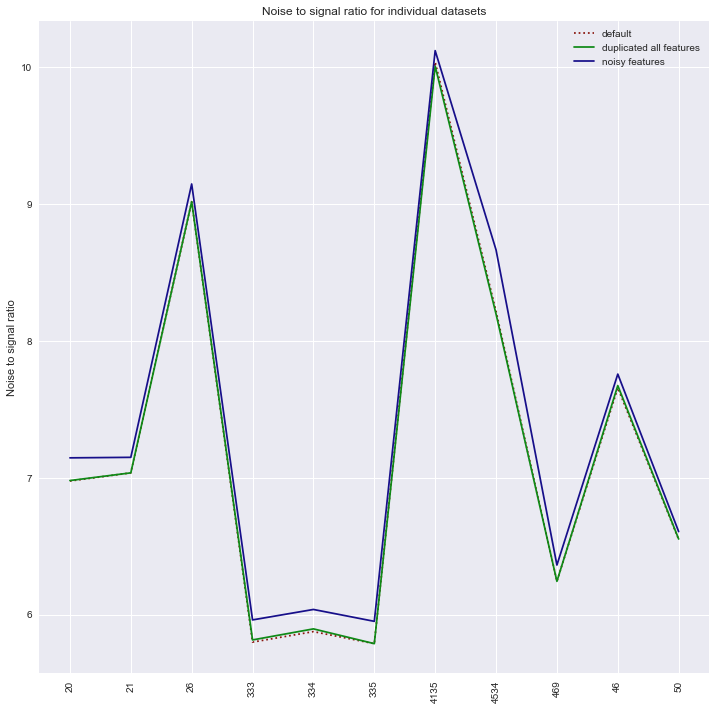

In [8]:
from LocalDatasets import read_did,read_did_cat,readDict
from metafeatures import information_theoretic_metafeatures
from Noise2 import add_copy,add_copy_features,add_noise_features2
from preamble import *
Cat = [20, 21, 26, 333, 334, 335, 4135, 4534, 469, 46, 50]
did = 46
x1 = []
x2 = []
x3 = []
info = 'MeanFeatureEntropy'
for did in Cat:
    X,y = read_did(did)
    cat = read_did_cat(did)

    x1.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)[info])
    amount = readDict(did)['NumberOfFeatures'] - 1
    X = add_noise_features2(X,cat,amount) 
    for i in range(amount):
        cat.append(True)
    x3.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)[info])
    X,y = read_did(did)
    X = add_copy_features(X,amount)    
    x2.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)[info])  
fig, ax = plt.subplots()
cl = sns.hls_palette(3, l=.3, s=.8)
x_axis =range(len(Cat))
_= ax.plot(x_axis,x1, color = cl[0],ls = ':' ,label = 'default')
_= ax.plot(x_axis,x2, color = cl[1], label = 'duplicated all features' )
_= ax.plot(x_axis,x3, color = cl[2], label = 'noisy features' )
_=plt.xticks(x_axis, Cat,rotation='vertical')
_=plt.title('Noise to signal ratio for individual datasets')
_=plt.ylabel('Noise to signal ratio')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(12)
fig.set_figwidth(12)
# ax.set_yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier
did = 333
didList = NonCat
count1 = []
count2 = []
# print('value between 0 and 1 giving the correlation between feature importance, first is correlation with initial dataset, second is correlation between features')
for i,did in enumerate(didList):
    X,y = read_did(did)
    output = [0,0]
    cat = read_did_cat(did)
    clf = RandomForestClassifier()
    _= clf.fit(X, y)
    output[0] = clf.feature_importances_
    amount = readDict(did)['NumberOfFeatures'] - 1
    X = add_copy(X,amount)
    clf = RandomForestClassifier()
    _= clf.fit(X, y)
    output[1] = clf.feature_importances_
    count1.append(0)
    count2.append(0)
    for j,x in enumerate(output[0]):
        if output[0][j] > output[1][j] + output[1][j+len(output[0])] - output[0][j]*0.05 and output[0][j] < output[1][j] + output[1][j+len(output[0])] + output[0][j]*0.05:
            count1[i] = count1[i] + 1
        if output[1][j] + 0.05*output[1][j+len(output[0])] > output[1][j+len(output[0])] and output[1][j] < output[1][j+len(output[0])] + 0.05*output[1][j]:
            count2[i] = count2[i] + 1
    count1[i] = count1[i]/amount
    count2[i] = count2[i]/amount
#     print(did,count1/amount,count2/amount)
data = np.ones((len(didList),3))
array1 = np.array(count1)
array2 = np.array(count2)
for i,x in enumerate(didList):
    data[i][0] = array1[i]
    data[i][1] = array2[i]
    data[i][2] = readDict(didList[i])['NumberOfFeatures']

didList = np.array(didList)
ind = 1
df = pd.DataFrame(data,columns=['correlation initial','correlation duplicate','NumberOfFeatures'],index=didList)
df

,correlation initial,correlation duplicate,NumberOfFeatures
1038,0.02,1.24e-02,971.0
1043,0.21,6.25e-02,49.0
1046,0.60,4.00e-01,6.0
1049,0.14,2.70e-02,38.0
1050,0.00,1.08e-01,38.0
1063,0.14,4.76e-02,22.0
1067,0.10,0.00e+00,22.0
1068,0.29,4.76e-02,22.0
1120,0.50,2.00e-01,11.0
1176,0.01,2.57e-03,1559.0


### Analysis Feature Importance
An initial analysis of feature importance shows little direct correlation between duplicated features. High correlations are found in datasets with only a few features. The first correlation is calculated as either the feature splitting up. The second correlation is calculated as only a small difference between the importance of a features.
##### side note- there seems to a lot of differency between runs 

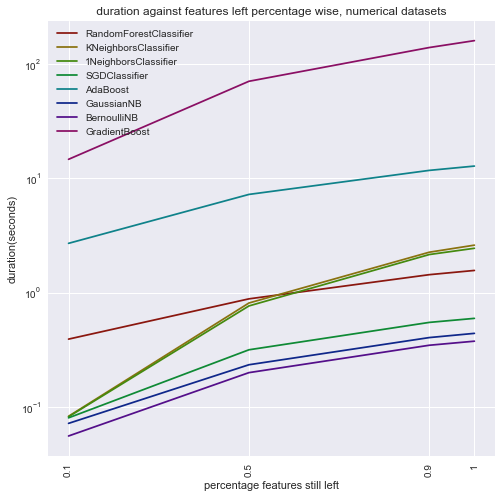

In [49]:
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'GaussianNB', 'BernoulliNB','GradientBoost']
#'SVC-rbf',
didList = [11,12,14,1014,1022,1025,1038,1043,1049,1050,1063,1067,1068,1176,1177,1462,1463,1464,1466,1467,1468,1475,1479,1485,1487,1489,1491,1492,1493,1494,1495,1497,1501,1504,1510,1515,40519]
didList = [12,14,1022,1038,1043,1049,1050,1063,1067,1068,1176,1462,1464,1466,1467,1468,1475,1479,1485,1487,1489,1491,1492,1493,1497,1501,1504,1510,1515]

func = 'scalability'
# didList = listDone
dur1 = []
dur2 = []
typ = 0
fig, ax = plt.subplots()
amountList = [0.0,0.1,0.5,0.9] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
    dur2[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,did,amount)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,amount)[typ]/len(didList)
#             dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,amount,did)[typ+2]/len(didList)
#             dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,amount,did)[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,amount)[typ+1]/len(didList)
#             dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,amount,did)[typ+3]/len(didList)
#             dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,amount,did)[typ+1]/(len(didList)*len(amountList))

cl = sns.hls_palette(len(dur2), l=.3, s=.8)
amountList = [1,0.9,0.5,0.1]
# for i,x in enumerate(amountList):
#     amountList[i] = x*100
x_axis = amountList
for i in range(0,len(dur2)):
    _= ax.plot(x_axis,dur1[i], color = cl[i],label = clfNames[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' duration against instances left percentage wise, numerical datasets ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage instances still left')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
# ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

### analysis scalability
The results shown exclude some results which show counter intuitive results (longer duration for smaller dataset). Those datasets will be run again to see if these results are reliable. The remaining results show a small trend of increased duration for more instances. 
The difference between only 10% of the dataset and 50% dataset is not for all classifiers a large increase in classification duration. This means that the classifiers need a lot of starting time for a dataset. 


In [10]:

clfName = '1NeighborsClassifier'
did = 11
amount = 0.0
read_duration(func,clfName,did,amount)

[0.017313606066636567, 0.017397575702943868, 0.0, 0.0]

In [40]:
func = 'scalability'
clfName = 'AdaBoost'
did = 12
didList = [11,12,14,1014,1022,1025,1038,1043,1049,1050,1063,1067,1068,1176,1177,1462,1463,1464,1466,1467,1468,1475,1479,1485,1487,1489,1491,1492,1493,1494,1495,1497,1501,1504,1510,1515,40519]

amountList = [0.0,0.1,0.5,0.9]
list1 = []
for i,did in enumerate(didList):
    list1.append([])
    for amount in amountList:
        list1[i].append(read_duration(func,clfName,did,amount)[0] + read_duration(func,clfName,did,amount)[1])

In [17]:
func = 'AdaBoost'
did = 11
amount = 0.0

read_duration(func,clfName,did,amount)

[0, 0, 0, 0]

In [18]:
print([1.5301908163351072, 0.08023905222580652, 0.0, 0.0]
[1.5935827604739643, 0.07867581749178498, 0.0, 0.0]
[1.4519409115000599, 0.08154104809045748, 0.0, 0.0]
[1.3714471513767421, 0.07826529926705916, 0.0, 0.0]

'scalability'

In [47]:
list1[0]
for x,i in enumerate(list1):
    if i[1] > i[0]:
        print(0.1,didList[x])
    if i[2] > i[1]:
        print(0.5,didList[x])
    if i[3] > i[2]:
        print(0.9,didList[x])

0.1 11
0.1 1014
0.1 1025
0.9 1025
0.5 1177
0.1 1463
0.1 1494
0.1 1495
0.1 40519


In [20]:
didList = [12,14,1022,1038,1043,1049,1050,1063,1067,1068,1176,1462,1464,1466,1467,1468,1475,1479,1485,1487,1489,1491,1492,1493,1497,1501,1504,1510,1515]


0.9

In [21]:
did

40519